# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
import os

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(y_train)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 39209


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

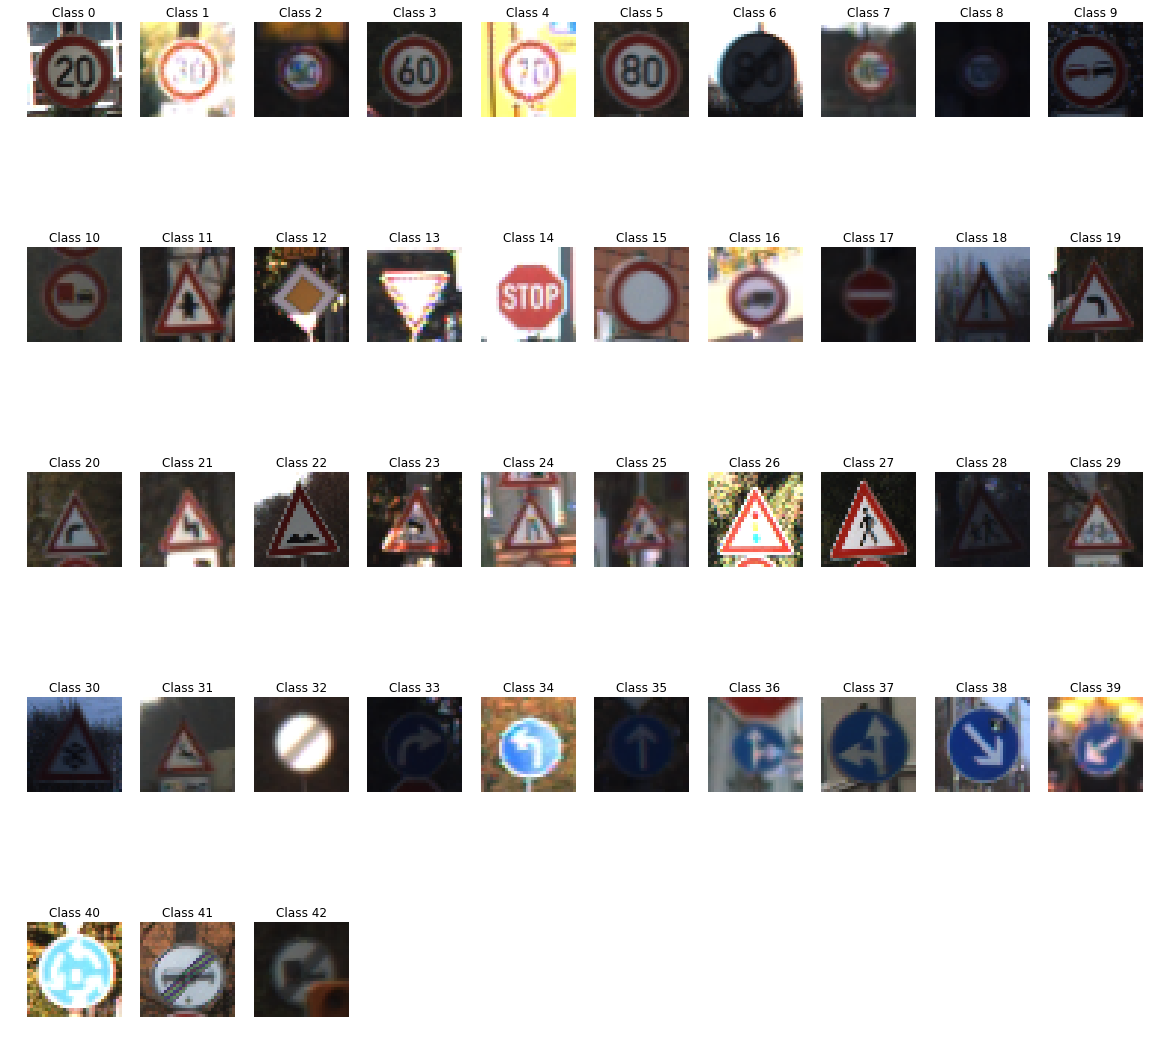

In [51]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

labels = y_train.tolist()
plt.figure(figsize=(20,20))
for i, label in enumerate(set(y_train)):
    plt.subplot(5, 10, i+1)
    plt.axis('off')
    plt.title("Class %s" % label)
    image = X_train[labels.index(label)]
    plt.imshow(image.squeeze())
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

In [5]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

**Answer:** Simple shuffling of data to make sure that we're getting randomization.

In [6]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

# We already have a test set, but we need validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=2423)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** Since test set was already provided I used scikit's train_test_split to get a validation set from the training set. I took 20% of the training set to be the validation set. 

In [44]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

# Hyperparameters
EPOCHS = 100
BATCH_SIZE = 128

keep_prob = tf.placeholder(tf.float32)

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Apply Dropout
    conv1 = tf.nn.dropout(conv1, keep_prob=keep_prob)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Apply Dropout
    conv2 = tf.nn.dropout(conv2, keep_prob=keep_prob)

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The architecture of my solution is based off of our LeNet-5 lectures with the exception of the adding dropout regularization that I discuss more below in the next questions.

**Input Layer:** LeNet requires we pass in a 32x32x3 images as input. 

**Layer 1 & 2:** We pass our input through convolution with 6 filters of size 5x5x3. Since our images are 32x32x3 we didn't have to pad the images for LeNet. After convolving through the image we take the resulting features maps and pass it through ReLu activation function, which gets rid of negative output but also adds non-linearity to our data. To prevent overfitting of our data we then pass the output of ReLu activation function into maxpooling using a 2x2 kernel. Maxpooling essentially "abstracts" our feature maps to emphasize the most important elements. To add more noise to our output I added dropout regularization afterwards.

**Layer 3, 4, and 5:** These layers are the fully-connected layers you see in LeNet-5. This implies that every neuron in the previous layer is connected to every neuron on the next layer. After being passed through Convolution -> ReLu -> Maxpooling -> Dropout we are left with high level features. The fully-connected layers take all the features detected and perform our classification through some simple and inexpensive calculuations with a set of weights (that are generated from a normal distribution with standard devation of 1 and a mean of 0) and biases. 

**Output:** Gives us our logits. 

In [49]:
# Placeholder for our input
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
with tf.device('/cpu:0'):
    one_hot_y = tf.one_hot(y, 43)

# Training rate
rate = 0.001

# Core of our training
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Checks accuracy of our predictions
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Train our model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .7})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    
    print()
          
    
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.239

EPOCH 2 ...
Validation Accuracy = 0.386

EPOCH 3 ...
Validation Accuracy = 0.495

EPOCH 4 ...
Validation Accuracy = 0.566

EPOCH 5 ...
Validation Accuracy = 0.653

EPOCH 6 ...
Validation Accuracy = 0.710

EPOCH 7 ...
Validation Accuracy = 0.774

EPOCH 8 ...
Validation Accuracy = 0.802

EPOCH 9 ...
Validation Accuracy = 0.811

EPOCH 10 ...
Validation Accuracy = 0.826

EPOCH 11 ...
Validation Accuracy = 0.872

EPOCH 12 ...
Validation Accuracy = 0.864

EPOCH 13 ...
Validation Accuracy = 0.884

EPOCH 14 ...
Validation Accuracy = 0.887

EPOCH 15 ...
Validation Accuracy = 0.912

EPOCH 16 ...
Validation Accuracy = 0.866

EPOCH 17 ...
Validation Accuracy = 0.931

EPOCH 18 ...
Validation Accuracy = 0.916

EPOCH 19 ...
Validation Accuracy = 0.935

EPOCH 20 ...
Validation Accuracy = 0.943

EPOCH 21 ...
Validation Accuracy = 0.942

EPOCH 22 ...
Validation Accuracy = 0.939

EPOCH 23 ...
Validation Accuracy = 0.937

EPOCH 24 ...
Validation Accura

In [50]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("Model restored")
    
    accuracy = evaluate(X_test, y_test)
    print("Validation Accuracy = {:.3f}".format(accuracy))


Model restored
Validation Accuracy = 0.927


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** Since I based my solution off of LeNet-5 my model is trained using the Adam Optimizer. I stuck with the same batch size of 128. After iterative testing I settled on: 100 epochs, 0.001 learning rate, and .7 droprate.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I based my model off of the LeNet-5 that we used in the CNN videos. It is a well established model and I figured it would be a good starting point. Without making any tweaks, the validation accuracy of LeNet-5 was already giving validation accuracy of 92.7%. Against the test set LeNet-5 was scoring 84.3% after only 10 epochs. It honestly made me wonder what changes I could make to improve this while refraining from testing against the test set - otherwise we'd be training towards the test.

I started off initially by changing some of the hyperparameters like inncreasing the epochs. This actually did increase our validation accuracy, but I was starting to feel like we were overfitting. Maxpooling in LeNet-5 is supposed to prevent overfitting by "blurring" or "obscuring" our data so that its not overfitting. This coupled with just dropping our learning rate from 0.001 to 0.0001 shot the validation accuracy to 97%! Part of me still felt we needed more noise to prevent overfitting and dependencies.

This led me to adding the dropout regularization technique. I initially set the the dropout probability rate to 75%. With neurons being dropped left and right the accuracy was very slowly increasing. This led me to bumping up the amount of epochs to 100 to offset the slower learning rate. I attempted to decrease the dropout probability to 50% and set the amount of epochs to upwards of 300 which resulted in horrible accuracy rates. So I slowly increased the dropout rate to see the effect it had on the accuracy rate and noticed as I slowly nudged the droput rate to 70% the accuracy kept climbing. What I settled on gave me 98% accuracy on the validation set and 92% on the test set. 


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

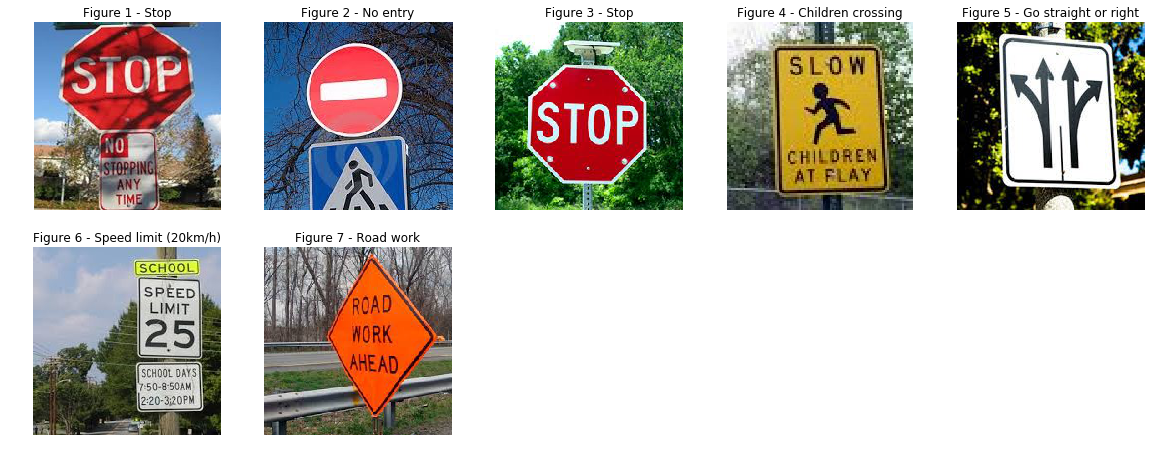

In [90]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import csv
%matplotlib inline
   

test_images = []
test_labels = [14,17,14,28,36,0,25]
sign_names = {}

with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader)
    for class_id, name in reader:
        sign_names[int(class_id)] = name

plt.figure(figsize=(20,20))
for i in range(1,8):
    image = cv2.imread('test-images/image%s.jpg' % i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.subplot(5, 5, i)
    plt.axis('off')
    plt.title('Figure %d - %s' % (i, sign_names[test_labels[i-1]]))
    plt.imshow(image, cmap="gray")
    
    image = cv2.resize(image, (32, 32))
    test_images.append(image)
    
    
plt.show()


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** 
(Look in the previous for figures referenced in this section)

**figure 1:** The shadows on the sign I think will will prevent our classifier from working correctly.

**figure 2:** Has a clear "No Entry" sign, but I am curious if the sign below will throw off our classifier.

**figure 5:** Isn't in our list of signs. Its a combination of 2 classifications: "Go Straight or Right" and "Go Straight or Left"

**figure 6:** Isn't part of our classes and has multiple signs. I don't think it will be able to class this one. If it does, I think it will classify it as "Speed Limit (20km/h)"

**figure 7:** Most of the signs we used for training are cropped and zoomed in. This one is slanted to the side. I think our classifier will have trouble with this one.

In [91]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("Model restored")
    
    test_accuracy = evaluate(test_images, test_labels)
    print("Test Images Accuracy = {:.3f}".format(accuracy))

Model restored
Test Images Accuracy = 0.286


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** This definitely did not perform nearly as well as our test set, but it actually performed better then I anticipated. As you can see above the accuracy of the image classification was around 29%. This is definitely attributed to the fact that our dataset isn't diverse or varied enough.

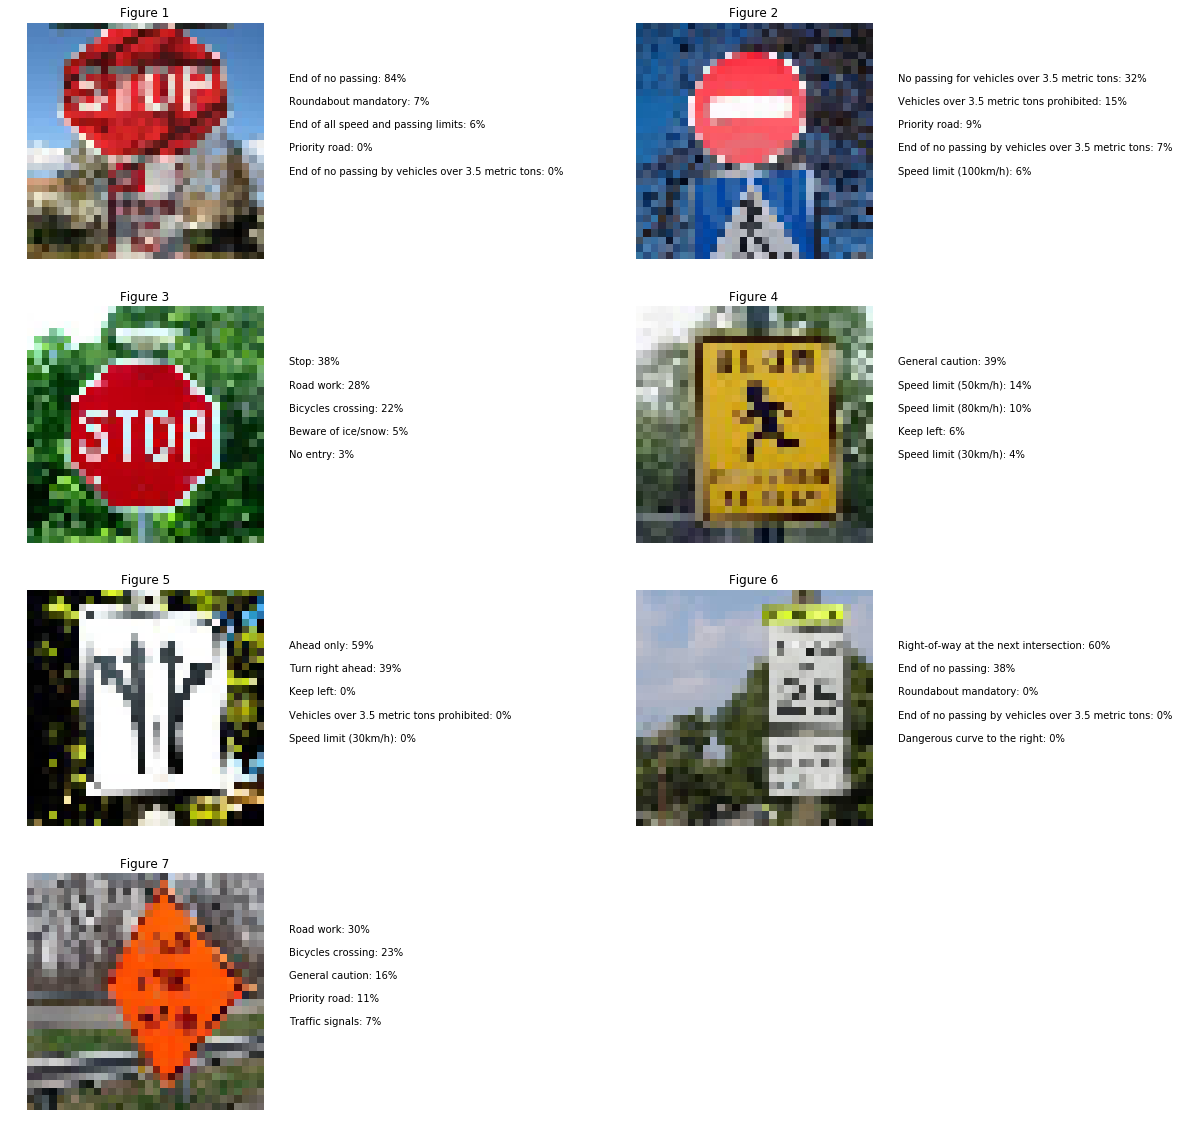

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

# Holds our predictions
predictions = tf.nn.softmax(logits)
plt.figure(figsize=(20,20))
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_predictions = tf.nn.top_k(predictions, k=5)
    
    result = sess.run(top_predictions, feed_dict={x: test_images, keep_prob: 1})
    result_prob = result[0]
    result_pred = result[1]
    
    for i, image in enumerate(test_images):
        plt.subplot(4, 2, i+1)
        plt.axis('off')
        
        # Grab data from results and show it
        probs = result_prob[i]
        preds = result_pred[i]
        info = ["%s: %d%%" % (sign_names[pred], prob * 100) for pred, prob in zip(preds, probs)]
        plt.text(35,20, "\n\n".join(info))
        plt.title("Figure {}".format(i+1))
        plt.imshow(image)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

**Figure 1:** As I thought the shadows would throw the prediction off, but I was surprised to see that stop sign prediction wasn't even in the top 5.

**Figure 2:** The sign below the "No Entry" sign through off the prediction. Again I was suprised "No Entry" didn't even show up in top 5.

**Figure 3:** It got this right. However, the probability for it classifying it as a stop sign was quite low.

**Figure 4:** It classified it as a "General Caution" sign, but should've classed it as a "Children Crossing" sign. Its not even in the top 5.

**Figure 5:** This one way off. I was again suprised that not even one of the 2 that I thought it would detect would be in the top 5.

**Figure 6:** I thought at the very least it would classify it as a speed limit sign, but its not in the top 5.

**Figure 7:** Even though the "Road Work" sign was at a slight angle it detected this one perfectly.

I honestly thought that **Figure 3** and **Figure 4** would've been classified perfectly. This was overall very surprising.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.